**Problema 5.2. de Raul Coss Bu**

En el famoso juego de la ruleta, existen muchas opciones para apostar. Una de ellas consiste en apostarle al color rojo o al color negro. En el tablero de la ruleta existen 10 números rojos, 10 números negros y 2 números verdes (cero y doble cero). Si un jugador apuesta a un color y el color aparece, el o ella gana la cantidad apostada. Si otro color aparece, el jugador pierde la cantidad apostada. Si el color verde aparece, la rueda de la ruleta se vuelve a girar hasta que el color rojo o negro aparezca. Si este color es el color que se apostó, el jugador no gana ni pierde. De otra forma, se pierde la cantidad apostada.

Para poder simular el juego requerimos la probabilidad de obtener cada uno de los tres posibles resultados:

$$P(obtener\hspace{0.5cm}rojo)=\frac{10}{22}=P(obtener\hspace{0.5cm}negro)$$
$$P(obtener\hspace{0.5cm}verde)=\frac{2}{22}$$

Entonces generamos 3 números aleatorios para obtener los resultados dados por las probabilidades anteriores

In [66]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [67]:
# Definimos la función para la probabilidad
def color():
  U1 = rnd.random()
  if U1 <= 1/11:
    C = 0 # Cae en verde
  elif 1/11 < U1 <= 6/11:
    C = 1 # Cae en rojo
  else:
    C = 2 # Cae en negro

  return U1, C

In [37]:
def generar_tabla(n):
    resultados = []
    for i in range(n):
        numero_aleatorio, color_obtenido = color()
        if color_obtenido == 0:
            color_nombre = "Verde"
        elif color_obtenido == 1:
            color_nombre = "Rojo"
        else:
            color_nombre = "Negro"
        resultados.append((numero_aleatorio, color_nombre))

    # Crear un DataFrame de pandas para una mejor presentación
    df = pd.DataFrame(resultados, columns=['Núm. aleatorio', 'Color'])
    df['Corrida'] = np.arange(1, len(df) + 1)
    print(df.to_string(index=False))

generar_tabla(10)

 Núm. aleatorio Color  Corrida
       0.104133  Rojo        1
       0.702113 Negro        2
       0.736712 Negro        3
       0.787379 Negro        4
       0.996030 Negro        5
       0.707429 Negro        6
       0.514878  Rojo        7
       0.163891  Rojo        8
       0.734172 Negro        9
       0.346230  Rojo       10


Dos jugadores usan diferentes estrategias. Un jugador simplemente apuesta $\$1$ al color rojo cada vez. El otro jugador empieza apostando un $\$1$ al color rojo. Si él gana, él apuesta otro $\$1$. Sin embargo, si él pierde, él apuesta $\$2$ la proxima vez. Si él pierde otra vez, él apuesta $\$4$. Este jugador puede continuar doblando la apuesta hasta un limite de $\$500$. Si el pierde esta apuesta de $\$500$, el empieza apostando nuevamente $\$1$.


Si cada jugador inicia el juego con $\$200$, ¿cúal cree usted que es la mejor estrategia?

Veamos el caso del primer jugador.

Debemos generar un contador que nos almacene las veces que cae rojo teniendo en cuenta las condiciones planteadas al incio.

In [61]:
# Simulamos el juego para el primer jugador
resultados = []

for i in range(10):
  numero_aleatorio, color_obtenido = color()

  if color_obtenido == 0: # Evaluamos el color que cae en la ruleta y se le asigna un pago
    color_nombre = "Verde"
    ganar = 0
    perder = 0
  elif color_obtenido == 1:
    color_nombre = "Rojo"
    ganar = 1
    perder = 0
  else:
    color_nombre = "Negro"
    ganar = 0
    perder = 1

  resultados.append((numero_aleatorio, color_nombre, ganar, perder))

# Crear el DataFrame
df = pd.DataFrame(resultados, columns=['Número Aleatorio', 'Color', 'Gana', 'Pierde'])
df['Corrida'] = np.arange(1, len(df) + 1)

# Mostrar el DataFrame
print(df.to_string(index=False))

 Número Aleatorio Color  Gana  Pierde  Corrida
         0.004740 Verde     0       0        1
         0.017351 Verde     0       0        2
         0.570842 Negro     0       1        3
         0.804499 Negro     0       1        4
         0.998508 Negro     0       1        5
         0.436804  Rojo     1       0        6
         0.749206 Negro     0       1        7
         0.899252 Negro     0       1        8
         0.153397  Rojo     1       0        9
         0.939867 Negro     0       1       10


In [62]:
# Contamos la ganancia obtenida
ganancia1 = 200 + sum(df['Gana']) - sum(df['Pierde'])
print("Ganancia del jugador 1: $", ganancia1)

Ganancia del jugador 1: $ 196


Este resultado es para una simulación de 10 corridas para el primer jugador, generamos ahora una simulación más grande así como su grafica.

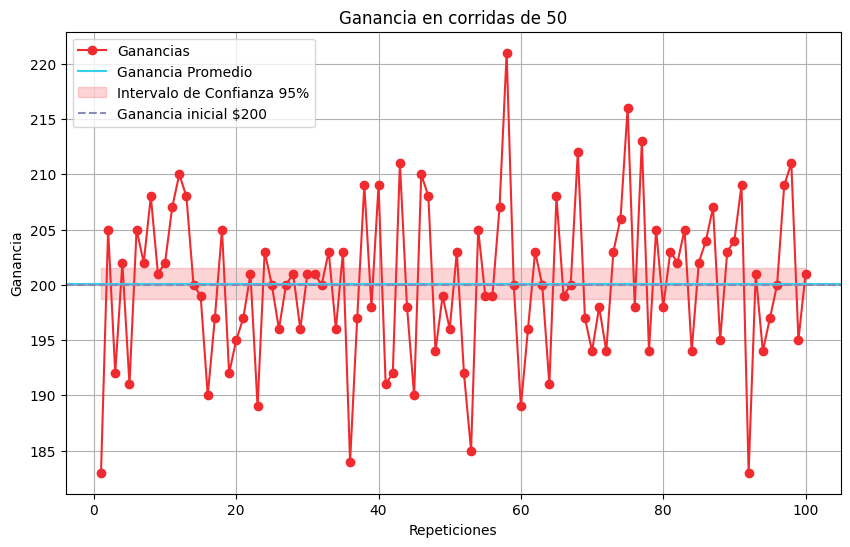

In [111]:
# Número de simulaciones
num_simulaciones = 100
ganancias = []

# Simulamos el juego para el primer jugador
for i in range(num_simulaciones):
    resultados = []

    for i in range(50):  # Aquí se define el número de tiradas por simulación
        numero_aleatorio, color_obtenido = color()

        if color_obtenido == 0:  # Evaluamos el color que cae en la ruleta y se le asigna un pago
            color_nombre = "Verde"
            ganar = 0
            perder = 0
        elif color_obtenido == 1:
            color_nombre = "Rojo"
            ganar = 1
            perder = 0
        else:
            color_nombre = "Negro"
            ganar = 0
            perder = 1

        resultados.append((numero_aleatorio, color_nombre, ganar, perder))

    # Crear el DataFrame
    df = pd.DataFrame(resultados, columns=['Número Aleatorio', 'Color', 'Gana', 'Pierde'])
    df['Corrida'] = np.arange(1, len(df) + 1)

    # Contamos la ganancia obtenida
    ganancia = 200 + sum(df['Gana']) - sum(df['Pierde'])
    ganancias.append(ganancia)

# Cálculo de la ganancia promedio e intervalos de confianza
ganancia_promedio = np.mean(ganancias)
intervalo_confianza = stats.t.interval(0.95, len(ganancias)-1, loc=ganancia_promedio, scale=stats.sem(ganancias))

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_simulaciones + 1), ganancias, color='#F02B30', marker='o', label='Ganancias')
plt.axhline(y=ganancia_promedio, color='#33D0EC', linestyle='-', label='Ganancia Promedio')
plt.fill_between(range(1, num_simulaciones + 1), intervalo_confianza[0], intervalo_confianza[1], color='#F02B30', alpha=0.2, label='Intervalo de Confianza 95%')
plt.xlabel('Repeticiones')
plt.ylabel('Ganancia')
plt.title('Ganancia en corridas de 50')

plt.axhline(y=200, color='#878CBB', linestyle='--', label='Ganancia inicial $200')
plt.grid(True)
plt.legend()
plt.show()

In [112]:
# Mostrar la ganancia promedio e intervalo de confianza
print(f"Ganancia Promedio: ${ganancia_promedio:.2f}")
print(f"Intervalo de Confianza 95%: (${intervalo_confianza[0]:.2f}, ${intervalo_confianza[1]:.2f})")

Ganancia Promedio: $200.11
Intervalo de Confianza 95%: ($198.71, $201.51)


Luego de realizar varias pruebas cambiando el número de corridas e iteracionces observamos que realmente no hay un aumento o un desenso significativo en la ganancia inicial para la estrategia del jugador 1.

Analizemos ahora la estrategia del jugador 2.

In [88]:
resultados = []
apuesta_actual = 1
ganancia_total = 0

for i in range(10):  # Ajusta el rango según tus necesidades
    numero_aleatorio, color_obtenido = color()

    if color_obtenido == 2:  # Negro
        ganar = -apuesta_actual
        ganancia_total += ganar
        apuesta_actual *= 2  # Duplicar la apuesta
    else:  # Rojo o Verde
        ganar = apuesta_actual
        ganancia_total += ganar
        apuesta_actual = 1  # Reiniciar la apuesta a $1 después de ganar

        if apuesta_actual > 500:  # Límite máximo de apuesta
            apuesta_actual = 1  # Reiniciar la apuesta a $1 si se alcanza el límite

    if ganar > 0:
        resultado = "Gana" # Salio rojo o verde
    else:
        resultado = "Pierde" # Salio negro

    resultados.append((numero_aleatorio, resultado, ganar, apuesta_actual, ganancia_total))

# Crear el DataFrame
df = pd.DataFrame(resultados, columns=['Número Aleatorio', 'Resultado', 'Gana', 'Apuesta Actual', 'Ganancia Total'])
df['Corrida'] = np.arange(1, len(df) + 1)

# Mostrar el DataFrame
print(df.to_string(index=False))

 Número Aleatorio Resultado  Gana  Apuesta Actual  Ganancia Total  Corrida
         0.945892    Pierde    -1               2              -1        1
         0.483990      Gana     2               1               1        2
         0.812688    Pierde    -1               2               0        3
         0.946290    Pierde    -2               4              -2        4
         0.912915    Pierde    -4               8              -6        5
         0.304194      Gana     8               1               2        6
         0.174533      Gana     1               1               3        7
         0.919713    Pierde    -1               2               2        8
         0.860425    Pierde    -2               4               0        9
         0.735160    Pierde    -4               8              -4       10


In [89]:
# Contamos la ganancia obtenida
ganancia2 = 200 + sum(df['Ganancia Total'])
print("Ganancia del jugador 2: $", ganancia2)

Ganancia del jugador 2: $ 195


Ahora generamos una simulación mas grande y graficamos.

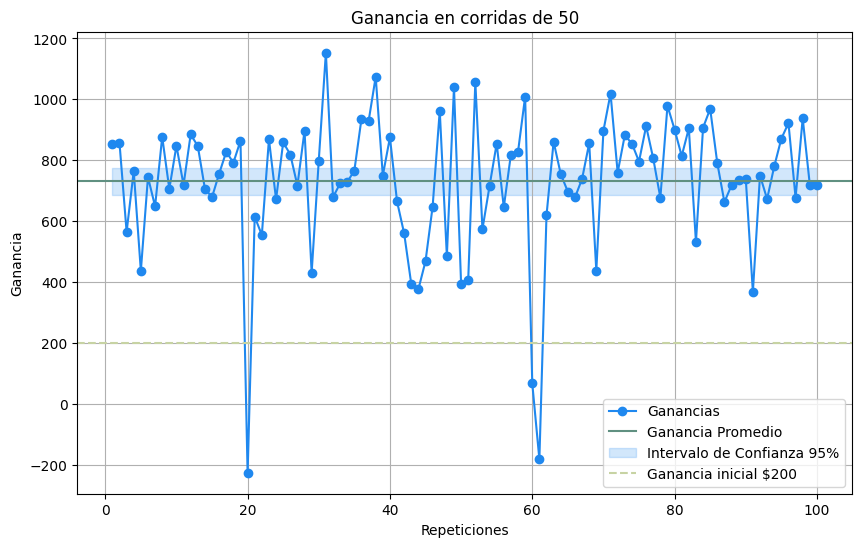

In [114]:
# Número de simulaciones
simulaciones = 100
ganancias2 = []

# Simulamos el juego para el segundo jugador
for i in range(simulaciones):
    resultados = []
    apuesta_actual = 1
    ganancia_total = 0

    for j in range(50):  # Ajusta el rango según tus necesidades
        numero_aleatorio, color_obtenido = color()

        if color_obtenido == 2:  # Negro
            ganar = -apuesta_actual
            ganancia_total += ganar
            apuesta_actual *= 2  # Duplicar la apuesta
        else:  # Rojo o Verde
            ganar = apuesta_actual
            ganancia_total += ganar
            apuesta_actual = 1  # Reiniciar la apuesta a $1 después de ganar

            if apuesta_actual > 500:  # Límite máximo de apuesta
                apuesta_actual = 1  # Reiniciar la apuesta a $1 si se alcanza el límite

        if ganar > 0:
            resultado = "Gana"  # Salió rojo o verde
        else:
            resultado = "Pierde"  # Salió negro

        resultados.append((numero_aleatorio, resultado, ganar, apuesta_actual, ganancia_total))

    # Crear el DataFrame
    df = pd.DataFrame(resultados, columns=['Número Aleatorio', 'Resultado', 'Gana', 'Apuesta Actual', 'Ganancia Total'])
    df['Corrida'] = np.arange(1, len(df) + 1)

    retorno = 200 + sum(df['Ganancia Total'])
    ganancias2.append(retorno)

# Cálculo de la ganancia promedio e intervalos de confianza
promedio = np.mean(ganancias2)
de = stats.t.interval(0.95, len(ganancias2)-1, loc=promedio, scale=stats.sem(ganancias2))

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, simulaciones + 1), ganancias2, color='#1F88EF', marker='o', label='Ganancias')
plt.axhline(y=promedio, color='#609081', linestyle='-', label='Ganancia Promedio')
plt.fill_between(range(1, simulaciones + 1), de[0], de[1], color='#1F88EF', alpha=0.2, label='Intervalo de Confianza 95%')
plt.axhline(y=200, color='#C7D3A3', linestyle='--', label='Ganancia inicial $200')
plt.xlabel('Repeticiones')
plt.ylabel('Ganancia')
plt.title('Ganancia en corridas de 50')

plt.grid(True)
plt.legend()
plt.show()

In [115]:
# Mostrar la ganancia promedio e intervalo de confianza
print(f"Ganancia Promedio: ${promedio:.2f}")
print(f"Intervalo de Confianza 95%: (${de[0]:.2f}, ${de[1]:.2f})")

Ganancia Promedio: $731.16
Intervalo de Confianza 95%: ($686.93, $775.39)


Observamos que se tienen picos con perdidas significativas, sin embargo, en promedio la ganancia es mayor que la apuesta incial y tambien mayor que las ganancias del jugador 1.

Por lo tanto, podriamos decir que la mejor estrategia es la de duplicar las apuestas, usada por el jugador 2.